In [21]:
# K-Nearest Neighbors (KNN) para Clasificación de Vino Tinto 🍷

In [22]:
## Paso 1: Cargar y explorar los datos
import pandas as pd

In [23]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url,sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
df.sample(10,random_state=2025)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1462,6.8,0.640,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6
1162,8.5,0.320,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7
412,7.1,0.735,0.16,1.9,0.100,15.0,77.0,0.99660,3.27,0.64,9.3,5
527,7.0,0.380,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6
1176,6.5,0.880,0.03,5.6,0.079,23.0,47.0,0.99572,3.58,0.50,11.2,4
1139,8.2,0.510,0.24,2.0,0.079,16.0,86.0,0.99764,3.34,0.64,9.5,6
1556,6.6,0.880,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
1128,10.0,0.430,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,5


In [25]:
## Paso 2: Preparación de los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
## Paso 3: Entrenamiento del modelo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test_scaled)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.609375
Confusion matrix:
 [[ 0  0  0  2  0  0]
 [ 0  0  7  4  0  0]
 [ 0  1 92 41  2  0]
 [ 0  1 38 80  9  0]
 [ 0  0  4 13 23  0]
 [ 0  0  0  1  2  0]]
Classification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.68      0.66       136
           6       0.57      0.62      0.59       128
           7       0.64      0.57      0.61        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.58      0.61      0.60       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
## Paso 4: Optimización de k
import matplotlib.pyplot as plt

In [34]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

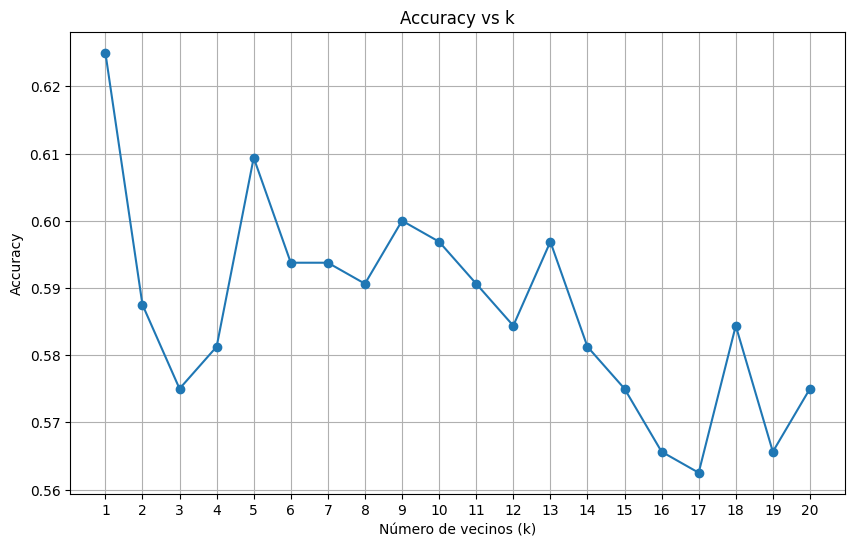

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

In [36]:
best_k = accuracies.index(max(accuracies)) + 1
print(f"Mejor valor de k: {best_k} con accuracy = {max(accuracies):.4f}")

Mejor valor de k: 1 con accuracy = 0.6250
